# Movie recommendation_collabarative_pearson correlation

### 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

### 2. Loading datasets

In [2]:
movie_title = pd.read_csv(r"C:\Users\sanjay\Desktop\Analytics Vidya\Python\MACHINE LEARNING\recommendation_krish naik\Movie recommendation_collabartive_Pearson correlation\Movie_Id_Titles_1a.txt")
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [3]:
u_data = pd.read_csv(r"C:\Users\sanjay\Desktop\Analytics Vidya\Python\MACHINE LEARNING\recommendation_krish naik\Movie recommendation_collabartive_Pearson correlation\u_data_1b.data_MOVIE LENS GROUP LENS WEBSITE")

In [4]:
u_data.head()

,0\t50\t5\t881250949
0,0\t172\t5\t881250949
1,0\t133\t1\t881250949
2,196\t242\t3\t881250949
3,186\t302\t3\t891717742
4,22\t377\t1\t878887116


In [5]:
u_data = pd.read_csv(r"C:\Users\sanjay\Desktop\Analytics Vidya\Python\MACHINE LEARNING\recommendation_krish naik\Movie recommendation_collabartive_Pearson correlation\u_data_1b.data_MOVIE LENS GROUP LENS WEBSITE",
                    sep ='\t',names = ['user_id', 'item_id', 'rating', 'timestamp'])

In [6]:
u_data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
# We have two datasets, movie_title and u_data, now let's join(merge them on item_id(since item_id is in both columns))
df = pd.merge(u_data,movie_title,on =['item_id'])
df.head() #1.df DATAFRAME

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100003 non-null  int64 
 1   item_id    100003 non-null  int64 
 2   rating     100003 non-null  int64 
 3   timestamp  100003 non-null  int64 
 4   title      100003 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [9]:
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


### 3. Performing EDA

In [10]:
#1. Let's see the (mean)average rating and count of rating with respect to title(descending order):groupby

#2. Create a rating dataframe which will have the mean and number of rating column:groupby (2.rating dataframe)

#3. Plot histogram for (mean and number of rating column) from rating dataframe

#4. Plot jointplot as mean of rating on x axis and number of rating on y axis(seaborn library)

In [11]:
df.groupby('title')['rating'].mean().sort_values(ascending = False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [12]:
df.groupby('title')['rating'].count().sort_values(ascending = False)

title
Star Wars (1977)                              584
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [13]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())

In [14]:
rating['number of rating'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [15]:
rating

,rating,number of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


<AxesSubplot:>

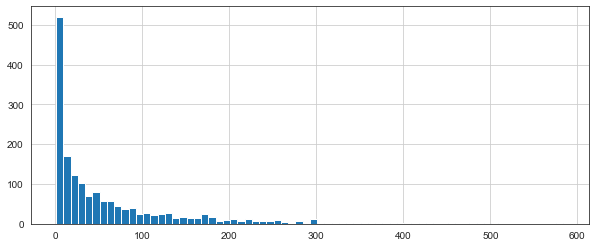

In [16]:
plt.figure(figsize = (10,4))
rating['number of rating'].hist(bins = 70)

<AxesSubplot:>

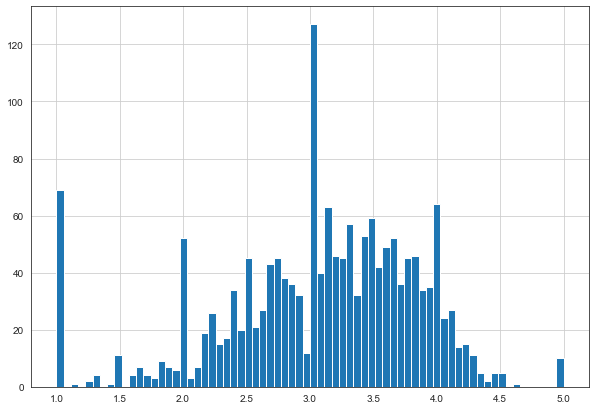

In [17]:
plt.figure(figsize=(10,7))
rating['rating'].hist(bins =70)

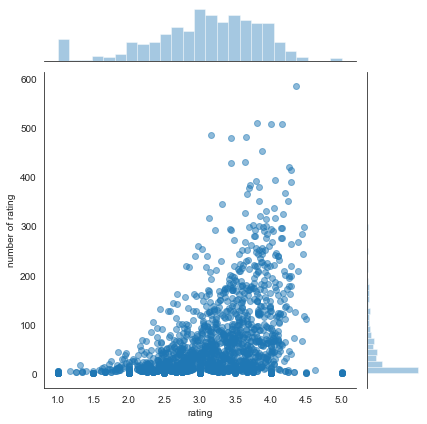

In [18]:
sns.jointplot(x='rating',y='number of rating',data = rating,alpha=0.5)

### 4. Recommending Similar Movies

In [19]:
#1. Let's create a matrix that has the user ids on one access and the movie title on another axis. 
#Each cell will then consist of the rating the user gave to that movie. .Note there will be a lot of NaN values, 
#because most people have not seen most of the movies(pivot_table) (3.moviemat dataframe)

#2. Check most rated movies

In [20]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [21]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
rating.head()

,rating,number of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [23]:
rating.sort_values('number of rating',ascending=False).head() #most rated movie is starwars

,rating,number of rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


##### Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy and recommend movies similar to these movies

In [24]:
#1. Grab the user rating for these two movies and store in different variable

#2. Use corr() method

#3. Let's clean by removing NaN values and using a DataFrame instead of a series

#4. Now create the correlation (but for no. of rating >100) and then find similar movies

In [25]:
#recommend movies similar to starwars and liar liar
starwars_rating = moviemat['Star Wars (1977)']
# liar_liar_rating = moviemat['Liar Liar (1997)']

In [26]:
starwars_rating

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [27]:
similar_to_starwars =  moviemat.corrwith(starwars_rating)
# similar_to_liarliar = moviemat.corrwith(liar_liar_rating)

C:\Users\sanjay\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\sanjay\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [28]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [29]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace = True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [30]:
corr_starwars.sort_values('Correlation',ascending=False).head()

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


In [31]:
#Let's fix this by filtering out movies that have less than 
#100 ratings (this value was chosen based off the histogram from earlier).
rating.head()

,rating,number of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [32]:
corr_starwars = corr_starwars.join(rating['number of rating'])

In [33]:
corr_starwars.head()

,Correlation,number of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [42]:
#hence even though the correlation of 'til there was you' is so much high w.r.t. star wars but because the number of rating 
#is only 9(maybe 9 people have only watched), so it's useless to recommend this movie to new users which holds a similarity
#as star wars. Consider only those top correlated movies(with star wars) whose rating is more than 100
corr_starwars[corr_starwars['number of rating']>100].sort_values('Correlation',ascending=False)

,Correlation,number of rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


##### Conclusion - Hence most correlated(similar movies to starwars) with high number of rating are Empire Strikes Back,Return of the Jedi,
##### Raiders of the Lost Ark. Hence these movies can be recommended